# Binary Classification (Dogs vs. Cats)

In [17]:
from tensorflow import keras

2025-12-01 19:02:55.117157: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 19:02:55.139596: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-01 19:02:55.272000: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-01 19:02:55.272716: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-01 19:02:56.207299: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

## Get Dataset Ready

In [13]:
import os, pathlib, shutil

base_dir = pathlib.Path("data/dogs-vs-cats")
kaggle_base_dir = pathlib.Path("data/kaggle")


## Split the Dataset to `train`, `valid`, and `test`.

In [14]:
# Let's define the train, valid, and test datasets
# 0 ~ 5999 for training: 6000 samples
# 6000 ~ 7999 for validation: 2000 samples
# 8000 ~ 9999 for testing: 2000 samples

# Create directories for the datasets


NUM_TRAIN = 6000
NUM_VALID = 2000
NUM_TEST = 2000

categories = ["cat", "dog"]
kaggle_data_directory = kaggle_base_dir / "train"
train_dir = base_dir / "train"
valid_dir = base_dir / "valid"
test_dir = base_dir / "test"

if not train_dir.exists():
    for category in categories:
        temp_train_dir = base_dir / "train" / f'{category}'
        temp_valid_dir = base_dir / "valid" / f'{category}'
        temp_test_dir = base_dir / "test" / f'{category}'

        os.makedirs(temp_train_dir)
        os.makedirs(temp_valid_dir)
        os.makedirs(temp_test_dir)



In [15]:
# Copy images to respective directories
num_samples = [ NUM_TRAIN, NUM_VALID, NUM_TEST ]
dirs = [ train_dir, valid_dir, test_dir ]

for dir in dirs:
    for category in categories:
        category_dir = dir / category
        # We assume the directory is created already
        start_index = 0
        if "valid" in str(dir):
            start_index = NUM_TRAIN
        elif "test" in str(dir):
            start_index = NUM_TRAIN + NUM_VALID

        for i in range(num_samples[dirs.index(dir)]):
            src = kaggle_data_directory / f"{category}.{start_index + i}.jpg"
            dst = category_dir / f"{category}.{start_index + i}.jpg"
            shutil.copyfile(src, dst)



## Create Dataset Objects

In [19]:
train_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32,
)
valid_ds = keras.utils.image_dataset_from_directory(
    valid_dir,
    image_size=(180, 180),
    batch_size=32,
)
test_ds = keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32,
)


Found 12000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


Data batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


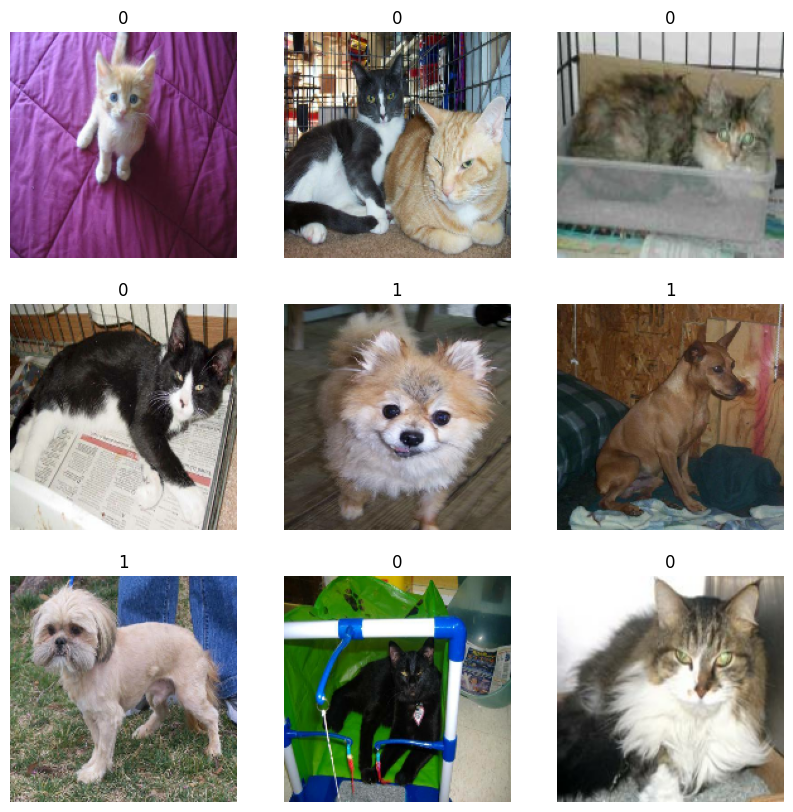

[0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1]


In [22]:
import matplotlib.pyplot as plt

for data_batch, labels in train_ds:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels.shape)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    plt.show()
    print(labels.numpy())
    break

## Create a simple CNN model to train this Dogs vs. Cats

In [23]:
from tensorflow import keras


In [24]:
input_shape = (180, 180, 3)
num_classes = 2
model = keras.Sequential(
    [
        keras.layers.Rescaling(1./255, input_shape=input_shape),
        keras.layers.Conv2D(32, 3, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(64, 3, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(128, 3, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax'),
    ]
)

In [25]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [26]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/dogs-vs-cats/cnn_model_epoch{epoch:02d}_valacc{val_accuracy:.2f}.h5',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        mode='max',
        restore_best_weights=True,
    ),
    keras.callbacks.TensorBoard(log_dir='logs/dogs-vs-cats')
]


In [ ]:
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=50,
    callbacks=callbacks
)
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy:.2f}') 

Epoch 1/50
375/375 [==============================] - ETA: 0s - loss: 0.6425 - accuracy: 0.6419

2025-12-01 19:27:36.737407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4000]
	 [[{{node Placeholder/_4}}]]
2025-12-01 19:27:36.738027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4000]
	 [[{{node Placeholder/_4}}]]


375/375 [==============================] - 135s 358ms/step - loss: 0.6425 - accuracy: 0.6419 - val_loss: 0.6525 - val_accuracy: 0.6428
Epoch 2/50
375/375 [==============================] - 135s 359ms/step - loss: 0.5376 - accuracy: 0.7273 - val_loss: 0.5422 - val_accuracy: 0.7297
Epoch 3/50
375/375 [==============================] - 131s 350ms/step - loss: 0.4380 - accuracy: 0.7961 - val_loss: 0.5384 - val_accuracy: 0.7408
Epoch 4/50
 71/375 [====>.........................] - ETA: 1:31 - loss: 0.3623 - accuracy: 0.8385

## DogsCats class

Let's implement DogsCats class based on the previous experiments.

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os, shutil


class DogsCatsConfig:
    def __init__(self):
        self.base_dir = pathlib.Path("data/dogs-vs-cats")
        self.kaggle_base_dir = pathlib.Path("data/kaggle")
        self.num_train = 6000
        self.num_valid = 2000
        self.num_test = 2000
        self.categories = ["cat", "dog"]
        self.kaggle_data_directory = self.kaggle_base_dir / "train"
        self.train_dir = self.base_dir / "train"
        self.valid_dir = self.base_dir / "valid"
        self.test_dir = self.base_dir / "test"
        self.image_shape = (180, 180, 3)

        self.epochs = 20
        self.batch_size = 32


class DogsCats:
    def __init__(self, config: DogsCatsConfig):
        self.config = config
        self._prepare_datasets()
        self.train_ds = None
        self.valid_ds = None
        self.test_ds = None
        self.model = None

    def _make_datasets_directories(self):
        for category in self.config.categories:
            temp_train_dir = self.config.base_dir / "train" / f'{category}'
            temp_valid_dir = self.config.base_dir / "valid" / f'{category}'
            temp_test_dir = self.config.base_dir / "test" / f'{category}'

            os.makedirs(temp_train_dir, exist_ok=True)
            os.makedirs(temp_valid_dir, exist_ok=True)
            os.makedirs(temp_test_dir, exist_ok=True)

    def _copy_datasets(self):
        num_samples = [ self.config.num_train, self.config.num_valid, self.config.num_test ]
        dirs = [ self.config.train_dir, self.config.valid_dir, self.config.test_dir ]

        for dir in dirs:
            for category in self.config.categories:
                category_dir = dir / category
                start_index = 0
                if "valid" in str(dir):
                    start_index = self.config.num_train
                elif "test" in str(dir):
                    start_index = self.config.num_train + self.config.num_valid

                for i in range(num_samples[dirs.index(dir)]):
                    src = self.config.kaggle_data_directory / f"{category}.{start_index + i}.jpg"
                    dst = category_dir / f"{category}.{start_index + i}.jpg"
                    shutil.copyfile(src, dst)


    def _prepare_datasets(self):
        self._make_datasets_directories()
        self._copy_datasets()


    def make_datasets(self):
        self.train_ds = keras.utils.image_dataset_from_directory(
            self.config.train_dir,
            image_size=self.config.image_shape[:2],
            batch_size=self.config.batch_size,
        )
        self.valid_ds = keras.utils.image_dataset_from_directory(
            self.config.valid_dir,
            image_size=self.config.image_shape[:2],
            batch_size=self.config.batch_size,
        )
        self.test_ds = keras.utils.image_dataset_from_directory(
            self.config.test_dir,
            image_size=self.config.image_shape[:2],
            batch_size=self.config.batch_size,
        )


    def build_model(self):
        self.model = keras.Sequential(
            [
                keras.layers.InputLayer(shape=self.config.image_shape),
                keras.layers.Rescaling(1./255),
                keras.layers.Conv2D(32, 3, activation='relu'),
                keras.layers.MaxPooling2D(),
                keras.layers.Conv2D(64, 3, activation='relu'),
                keras.layers.MaxPooling2D(),
                keras.layers.Conv2D(128, 3, activation='relu'),
                keras.layers.MaxPooling2D(),
                keras.layers.Flatten(),
                keras.layers.Dense(128, activation='relu'),
                keras.layers.Dense(len(self.config.categories), activation='softmax'),
            ]
        )

        self.model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'],
        )
        self.model.summary()

    def train_model(self, model_name: str, enforce: bool = False):
        if enforce is False and os.path.exists(f'models/dogs-vs-cats/{model_name}_final.keras'):
            print("Loading existing model...")
            self.load_model(f'models/dogs-vs-cats/{model_name}_final.keras')
            return
            
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                filepath=f'models/dogs-vs-cats/{model_name}_epoch{{epoch:02d}}_valacc{{val_accuracy:.2f}}.keras',
                save_best_only=True,
                monitor='val_accuracy',
                mode='max',
            ),
            keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                patience=3,
                mode='max',
                restore_best_weights=True,
            ),
            keras.callbacks.TensorBoard(log_dir=f'logs/dogs-vs-cats/{model_name}')
        ]

        history = self.model.fit(
            self.train_ds,
            validation_data=self.valid_ds,
            epochs=self.config.epochs,
            callbacks=callbacks
        )

        self.model.save(f'models/dogs-vs-cats/{model_name}_final.keras')

    def load_model(self, model_path: str):
        self.model = keras.models.load_model(model_path)
        #self.model.summary()
    
    def evaluate_model(self):
        results = self.model.evaluate(self.test_ds)
        print(f'Test Loss: {results[0]:.4f}')
        print(f'Test Accuracy: {results[1]:.4f}')

    def predict(self, image_file: str):
        image = keras.preprocessing.image.load_img(image_file)

        image = keras.preprocessing.image.img_to_array(image)
        image = keras.preprocessing.image.smart_resize(image, self.config.image_shape[:2])

        image = np.expand_dims(image, axis=0)  # Add batch dimension

        predictions = self.model.predict(image)
        predicted_class = np.argmax(predictions, axis=1)[0]

        return self.config.categories[predicted_class]
    


2025-12-03 13:42:29.273476: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Test the DogsCats class
config = DogsCatsConfig()
dogs_cats = DogsCats(config)
dogs_cats.make_datasets()
dogs_cats.build_model()
dogs_cats.train_model("jaerock-kwon")



Found 12000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


2025-12-03 13:42:33.786483: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-12-03 13:42:33.786512: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-12-03 13:42:33.786518: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: area-51-r5
2025-12-03 13:42:33.786522: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] hostname: area-51-r5
2025-12-03 13:42:33.786600: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] libcuda reported version is: 535.274.2
2025-12-03 13:42:33.786617: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:194] kernel reported version is: 535.274.2

Found 4000 files belonging to 2 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,234 (25.36 MB)

 Trainable params: 6,647,234 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

Loading existing model...


In [41]:
dogs_cats.evaluate_model()


125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.8048 - loss: 0.4770
Test Loss: 0.4770
Test Accuracy: 0.8048


Let's test the trained model with some test images!

In [3]:
import random

# Get three random numbers from 8000 to 9999
random_numbers = random.sample(range(8000, 9999), 3)
print(random_numbers)

for num in random_numbers:
    dogs_cats.predict(f"data/dogs-vs-cats/test/cat/cat.{num}.jpg")

[8510, 9533, 8315]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [4]:
# Get three random numbers from 8000 to 9999
random_numbers = random.sample(range(8000, 9999), 3)
print(random_numbers)

for num in random_numbers:
    dogs_cats.predict(f"data/dogs-vs-cats/test/dog/dog.{num}.jpg")

[9874, 9011, 8900]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Let's show the prediction results with the input images in 3x3 figures.

In [5]:
import random
import matplotlib.pyplot as plt

# Get nine random numbers from 8000 to 9999 (test set ranges)
random_numbers = random.sample(range(8000, 9999), 9)
print(random_numbers)

[8267, 8959, 9026, 8043, 9675, 9364, 8216, 9790, 9639]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


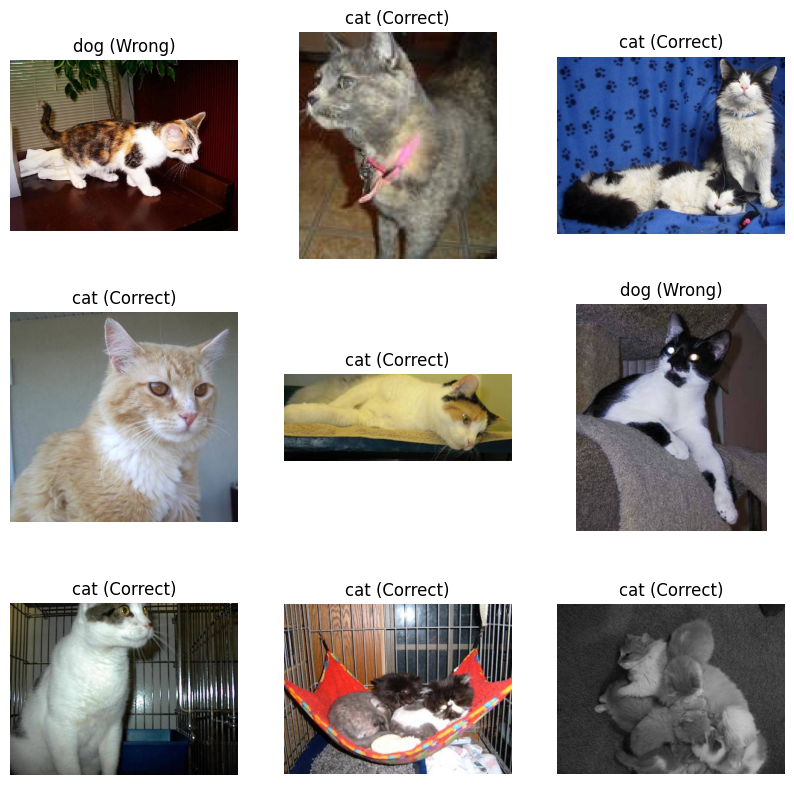

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


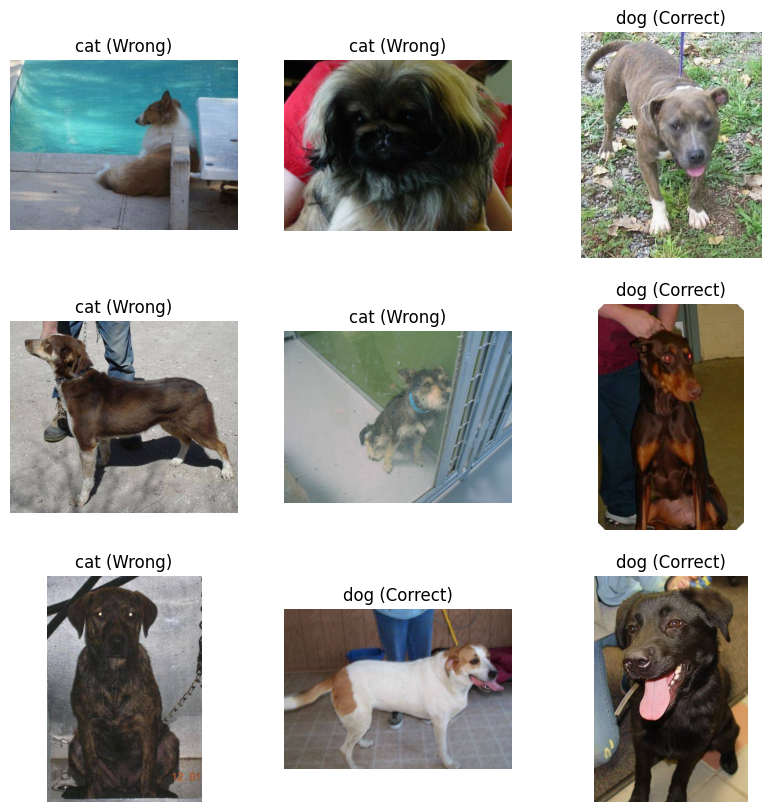

In [9]:
categories = ["cat", "dog"]

for category in categories:
    plt.figure(figsize=(10, 10))
    for i, num in enumerate(random_numbers):
        ax = plt.subplot(3, 3, i + 1)
        image_path = f"data/dogs-vs-cats/test/{category}/{category}.{num}.jpg"

        image = keras.preprocessing.image.load_img(image_path)
        image_array = keras.preprocessing.image.img_to_array(image).astype("uint8")

        prediction = dogs_cats.predict(image_path)
        if prediction == category:
            prediction += " (Correct)"
        else:
            prediction += " (Wrong)"

        plt.imshow(image_array)
        plt.title(prediction)
        plt.axis("off")
    plt.show()
